## Required libraries

In [ ]:
import os
import pickle
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

## Read dataset

In [ ]:
DATA_PATH = '../input/crop-recommendation-dataset/Crop_recommendation.csv'

In [ ]:
df = pd.read_csv(DATA_PATH)

### Available independent features
* N - ratio of Nitrogen content in soil
* P - ratio of Phosphorous content in soil
* K - ratio of Potassium content in soil
* temperature - temperature in degree Celsius
* humidity - relative humidity in %
* ph - ph value of the soil
* rainfall - rainfall in mm

## Data preprocessing

In [ ]:
df.head()

In [ ]:
df.describe(include="all")

In [ ]:
df['label'].value_counts()

### As you can see from the above description:
### Dataset has:
* No missing values
* 7 independent features and 1 dependent feature
* 2200 samples in each feature.
* Class balance
* Seems clean and preprocessed
* Therefore, we can directly use for training.


In [ ]:
correlation_mat = df.corr()
correlation_mat
plt.figure(figsize=(10,8))
sns.heatmap(correlation_mat, linewidths=.5,annot=True, fmt="f")

### From the above plot:
* It can be said that Phosphorous and Potassium features are 73% correlated.
* And Temperature and Humidity are slightly correlated.
* If you have two highly correlated features in your dataset, you can opt for one of them because another one can act as duplicate data in your training dataset.
* However, in this case, dataset does not have too many features. So, all features will be kept.

In [ ]:
X = df.iloc[:,:-1]     # selecting all features except 'label' feature 
y = df.iloc[:,-1]      # selecting 'label' feature as dependent feature

In [ ]:
# Splitting dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =2)

In [ ]:
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

## Model training

In [ ]:
KNN_model = KNeighborsClassifier()

In [ ]:
KNN_model.fit(X_train,y_train)

## Evaluating the model

In [ ]:
y_pred = KNN_model.predict(X_test)

## Visualize the results

In [ ]:
results = classification_report(y_test, y_pred)
print(results)

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred, labels=KNN_model.classes_)
figure, axes = plt.subplots(1, figsize=(15,15))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat,  display_labels=KNN_model.classes_)
disp.plot(ax = axes, xticks_rotation='vertical') 

### As you can observe from the above heatmap is that:
* Accuracy of the model is 97%
* There are 11 wrong predictions.
* The majority of wrong predictions came from 'rice' and 'jute' categories

## Error analysis

In [ ]:
rice_df = df[df["label"] == 'rice']
jute_df = df[df["label"] == 'jute']
df_rice_jute = pd.concat([rice_df, jute_df])

In [ ]:
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value
        # we change the bar width
        patch.set_width(new_value)
        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

for col in df.columns[:-1]:
    fig, ax = plt.subplots(1,2, figsize=(15,5), gridspec_kw={'width_ratios': [3.5, 0.5]})
    sns.barplot(x = df['label'], y = df[col], data=df, ax = ax[0])
    sns.barplot(x = df_rice_jute['label'], y = df_rice_jute[col], data=df_rice_jute, ax = ax[1])
    change_width(ax[1], 0.5)
    fig.autofmt_xdate(rotation=60)
    plt.show()

### From the above barplots:
* Each feature plot is representing influence on crop recommendation system.
* For example: the plot (rainfall vs label)
* Higher rainfall --> the most likely crop is rice 
* Low rainfall  --> the most likely crop is muskmelon




* If you see the difference between only Rice and Jute with respect to each feature:
* There is no much variance between Rice and Jute categories --> this might be the reason for the model to be unable to differentiate between these two.


## Model pickling

In [ ]:
# open a file, where you ant to store the data
file = open('KNN_model_crop_prediction.pkl', 'wb')
# dump information to that file
pickle.dump(KNN_model, file)

## Model deployment

### For model deployment, we require the following things::
* Trained ML model
* Web app integradted with trained model.
* Deployment plantform --> Google cloud, Azure, AWS, Heroku
* Heroku provides free deployment facility (Google cloud is also providing) where as Azure and AWS are expensive.
* I have used Heroku (https://dashboard.heroku.com/) to deploy the model.

## Heroku deployment steps:

* I have used Dash-Plotly (https://dash.plotly.com/introduction) framework to create my simple web app. It will display the name of the predicted crop and corresponding crop image based on user inputs.

* Take a look at the 'app.py' script in my repo (you can also and add some graphs that can illustrate the feature trends). Let me know if you want me to add any other functionalities in the comments.

* You can automatically create 'requirements.txt' file with 'pip freeze > requirements.txt' command in cmd.

* 'Procfile' is a process file that is required for all Heroku applications. 


## step-1: setup repo
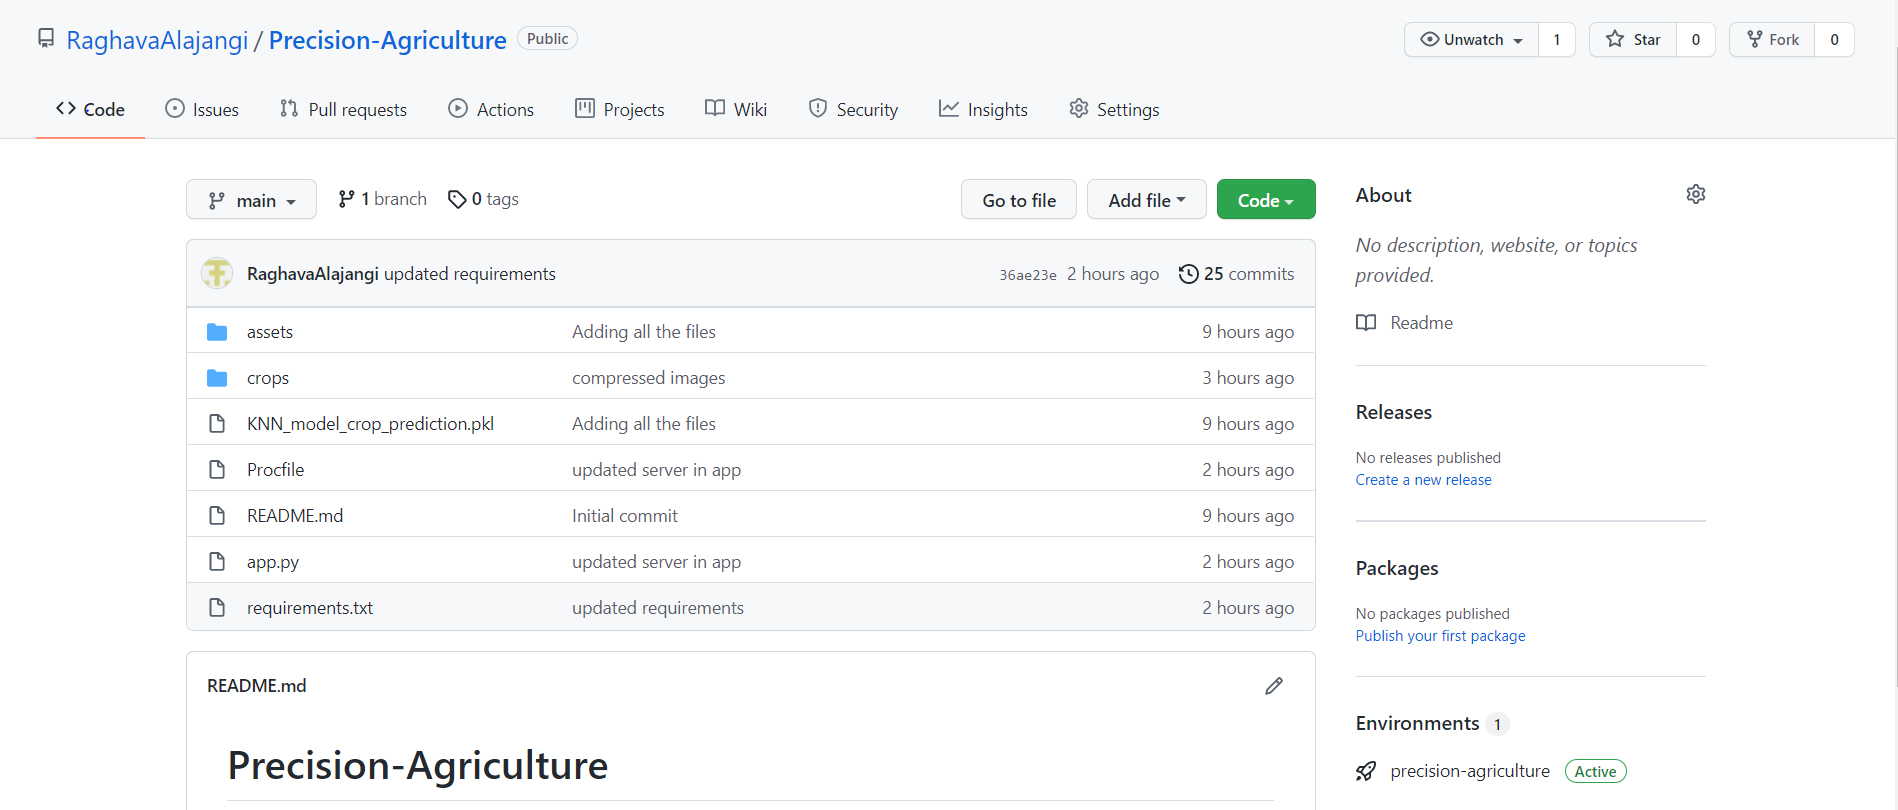

******

* Create a repository in the github: You can take a look at my repository.(https://github.com/RaghavaAlajangi/Precision-Agriculture)
* It should contain:
1. assest (Folder --> consists of style.css and logo image file)
2. crops (Image folder --> consists of crop images)
3. Web app script (app.py)
4. Procfile
5. Trained model (KNN_model_crop_prediction.pkl)
6. requirements.txt



## step-2: 

### create an account in heroku 

(https://id.heroku.com/login)

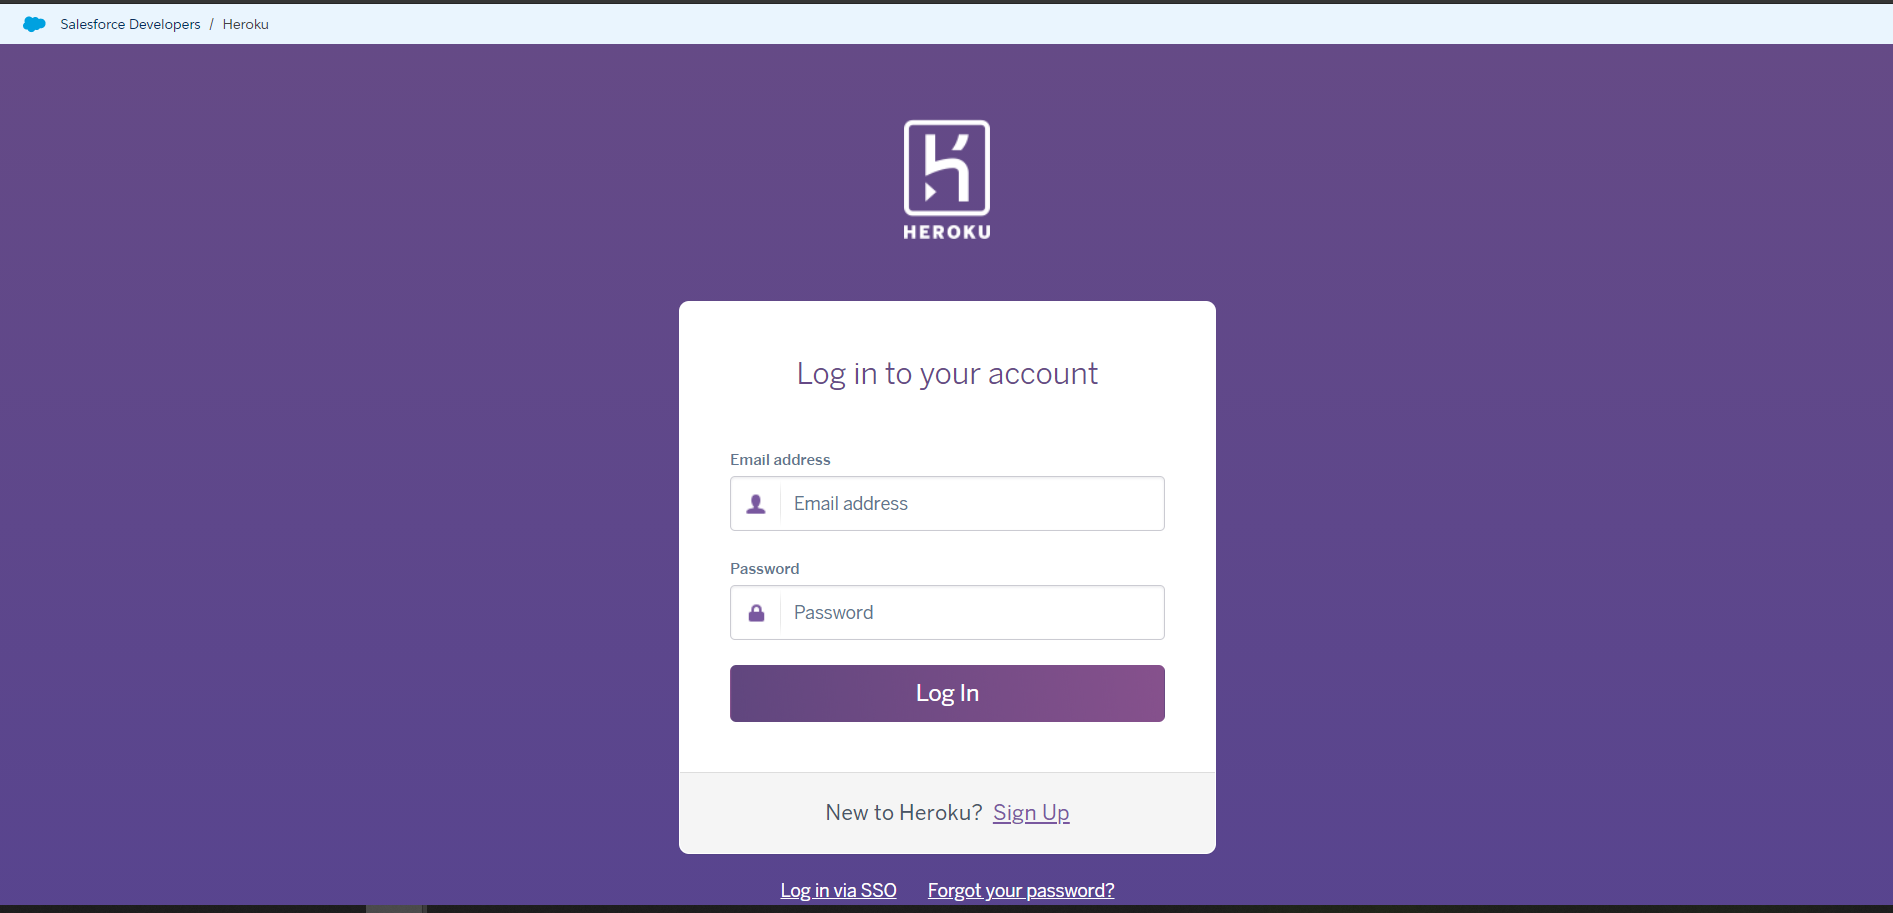


### create a new app or project!

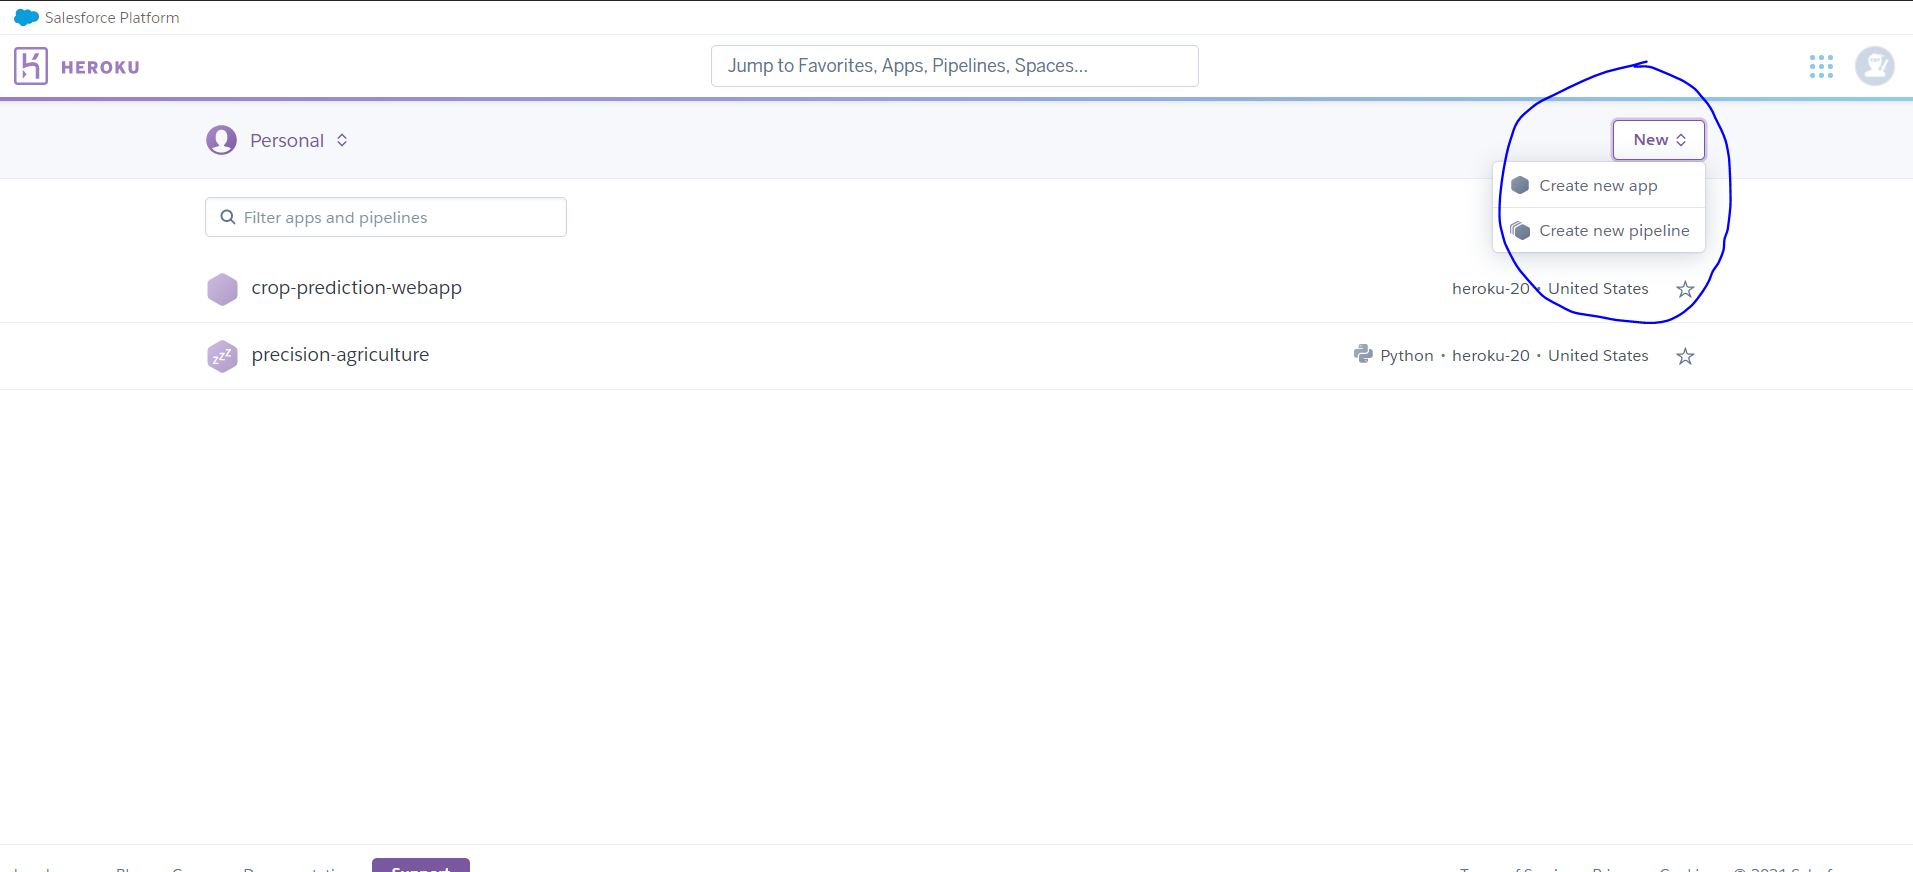

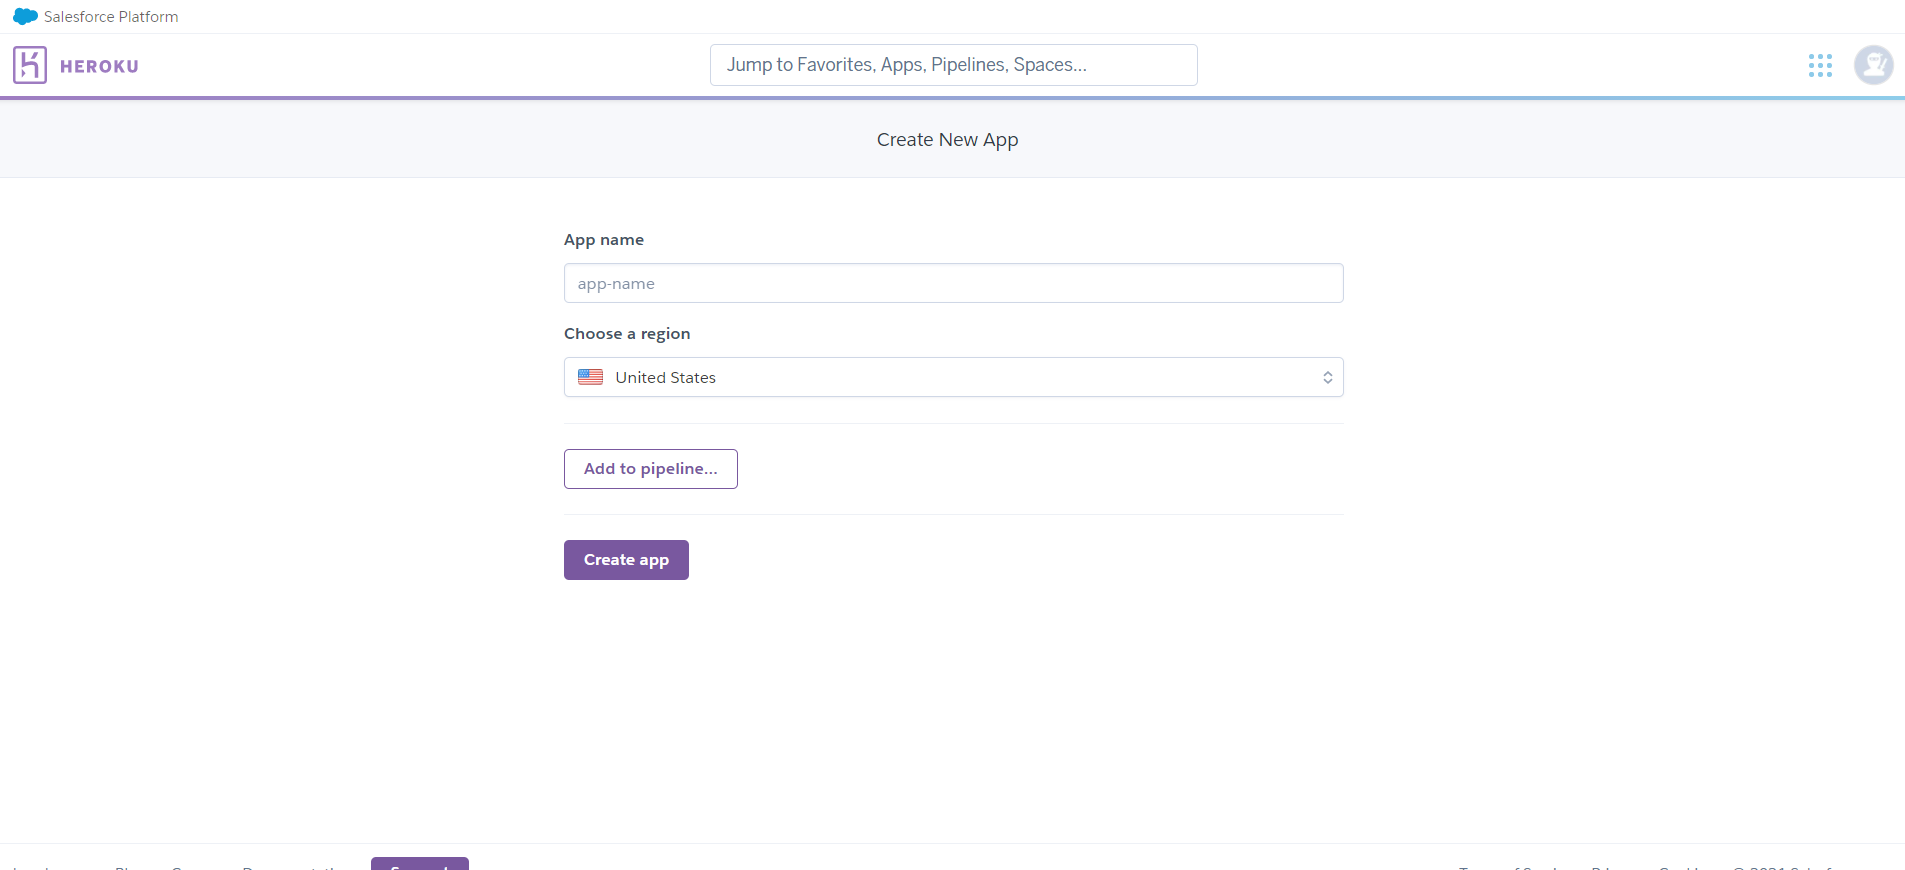


### In deploy section connect with github

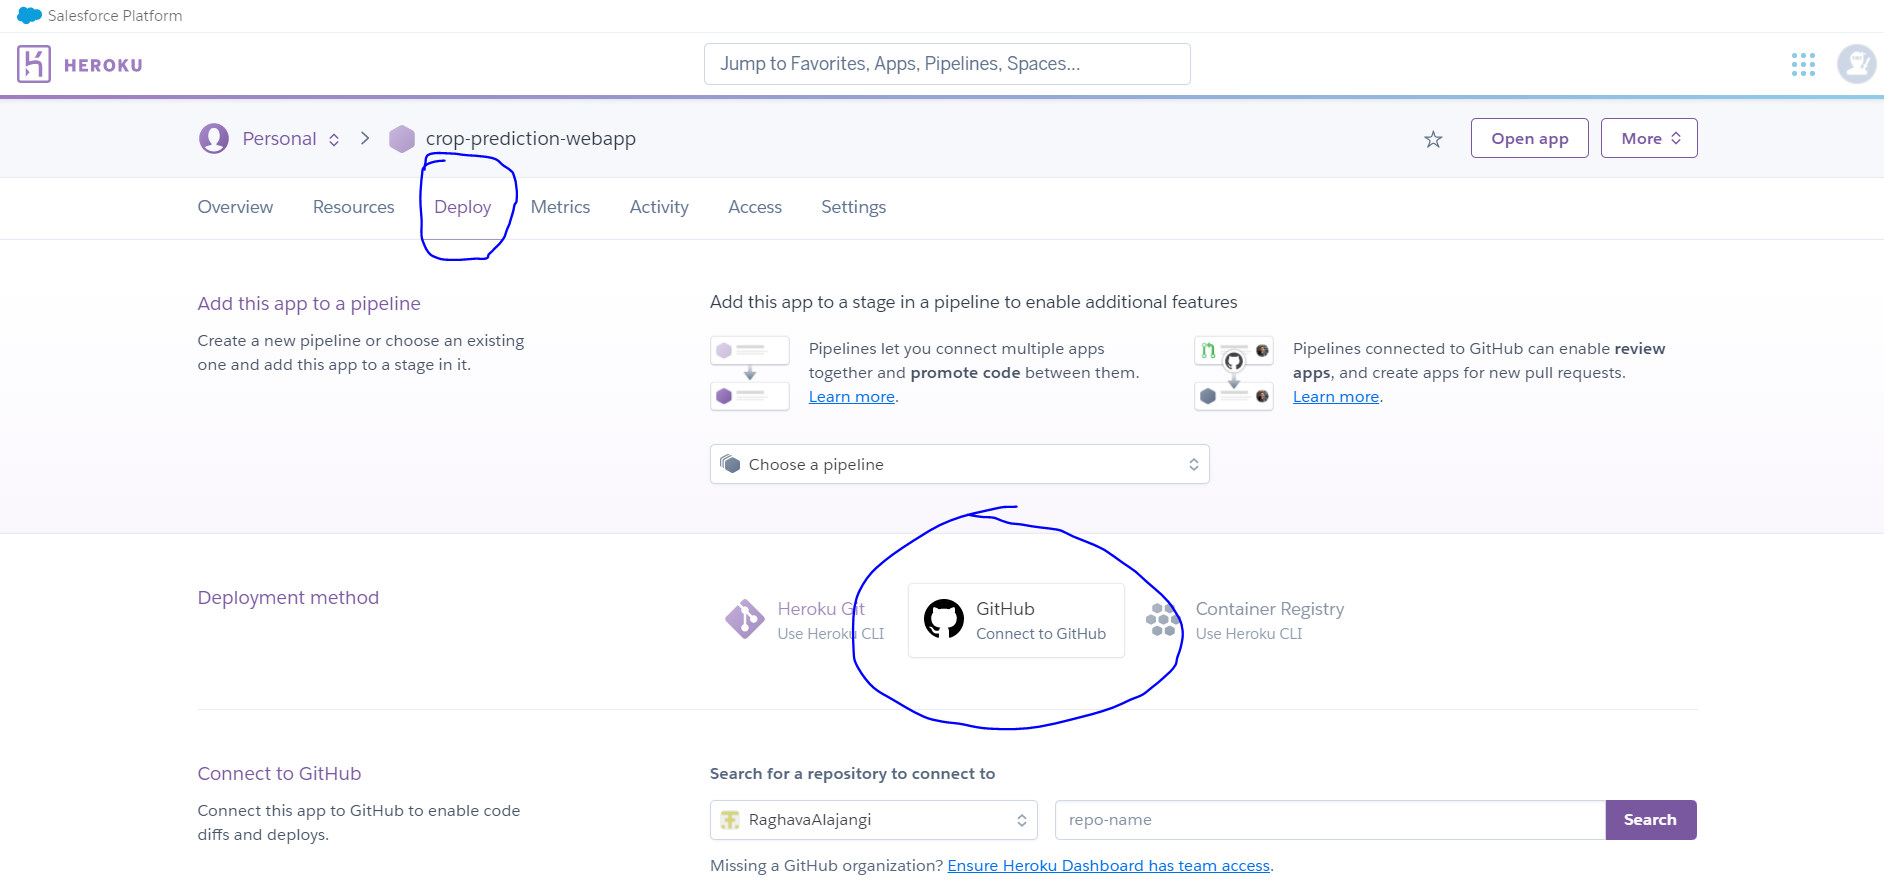

### select your rescpective repository

### deploy branch

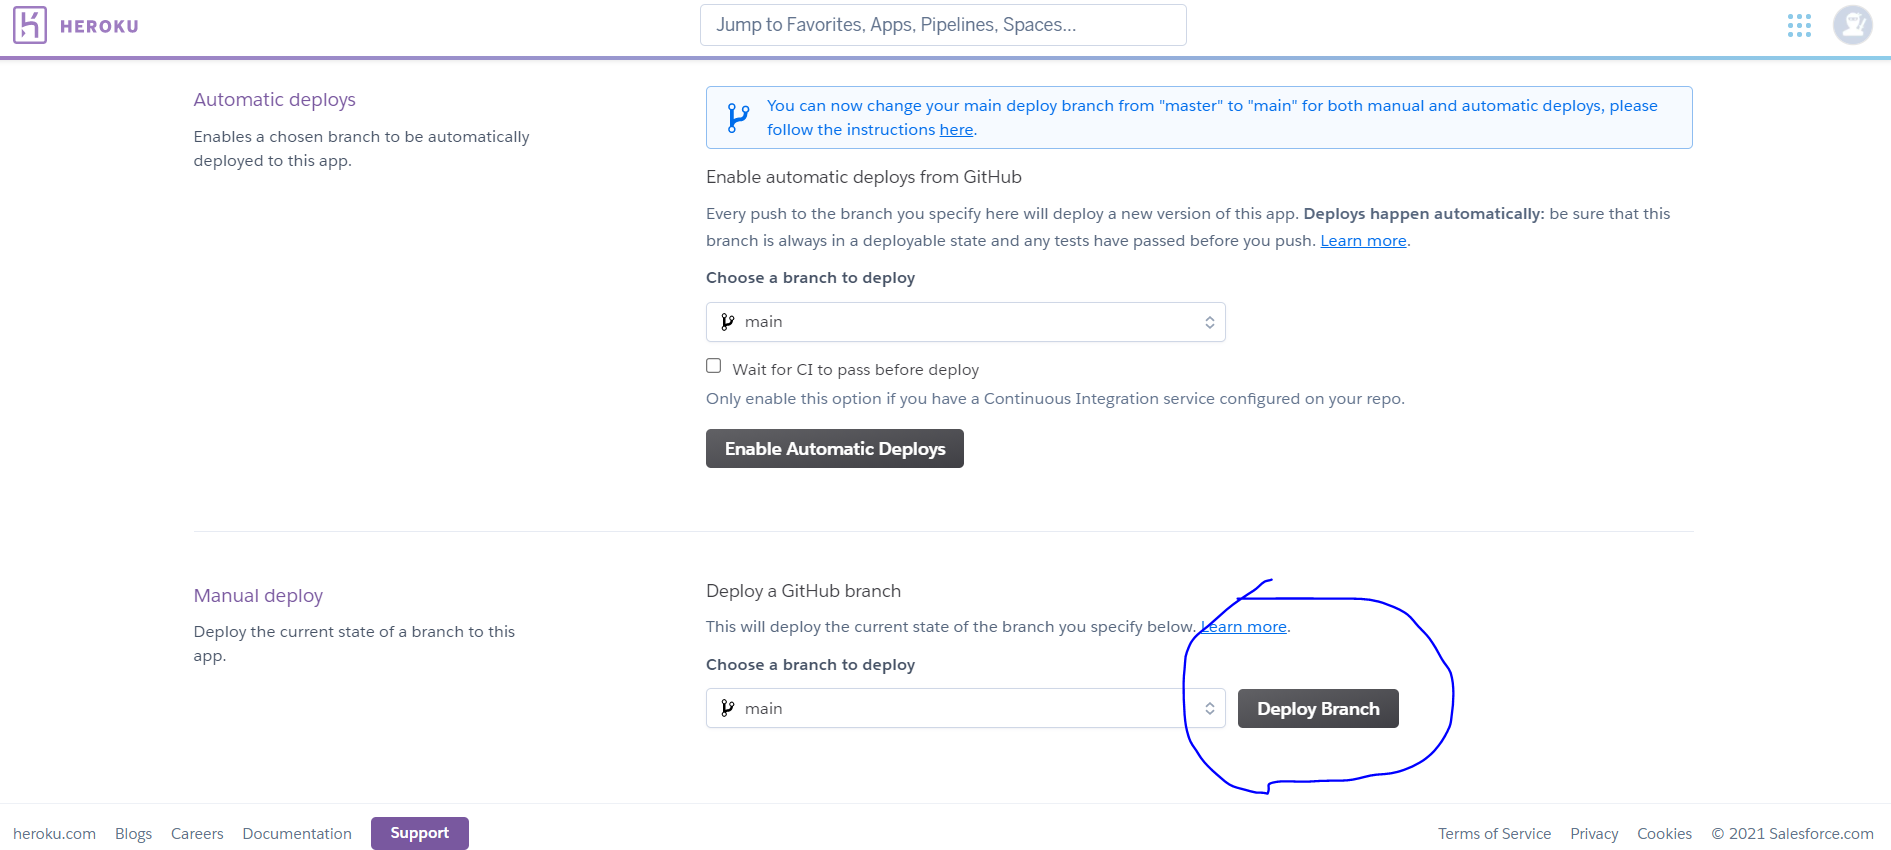

## It will provide you with the link to the deployed application.

(https://precision-agriculture.herokuapp.com/)

In [ ]:
###